# Problem set 2: Finding the Walras equilibrium in a multi-agent economy

In [1]:
%load_ext autoreload
%autoreload 2

# Tasks

## Drawing random numbers

Replace the missing lines in the code below to get the same output as in the answer.

In [2]:
import numpy as np
np.random.seed(1986)
state = np.random.get_state()
for i in range(3):
    np.random.set_state(state)
    for j in range(2):
        x = np.random.uniform()
        print(f'({i},{j}): x = {x:.3f}')

(0,0): x = 0.569
(0,1): x = 0.077
(1,0): x = 0.569
(1,1): x = 0.077
(2,0): x = 0.569
(2,1): x = 0.077


**Answer:**

See A1.py

## Find the expectated value

Find the expected value and the expected variance

$$ 
\mathbb{E}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} g(x_i)
$$
$$ 
\mathbb{VAR}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} \left( g(x_i) - \frac{1}{N}\sum_{i=1}^{N} g(x_i) \right)^2
$$

where $ x_i \sim \mathcal{N}(0,\sigma) $ and

$$ 
g(x,\omega)=\begin{cases}
x & \text{if }x\in[-\omega,\omega]\\
-\omega & \text{if }x<-\omega\\
\omega & \text{if }x>\omega
\end{cases} 
$$

In [3]:
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)


def g(x, omega):

    if x > omega:
        return omega
    elif x < -omega:
        return -omega
    else:
        return x



x = np.random.normal(0, sigma, N)

# Apply the function g to each element of x
g_values = np.array([g(xi, omega) for xi in x])

# Calculate the mean and variance of g_values
mean = np.mean(g_values)
variance = np.var(g_values)

print(f"Mean: {mean:.5f}" )
print(f"Variance: {variance:.5f}")



Mean: -0.00264
Variance: 2.69804


**Answer:**

See A2.py

## Interactive histogram

**First task:** Consider the code below. Fill in the missing lines so the figure is plotted.

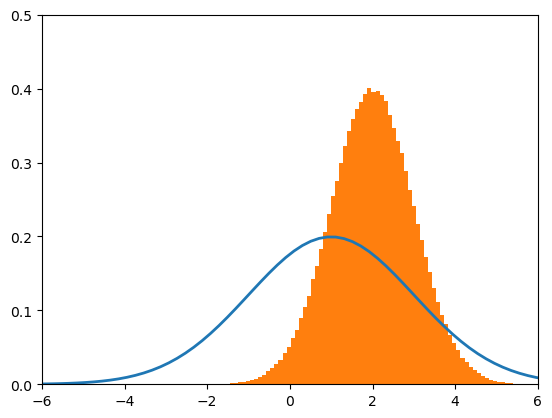

In [4]:
# a. import
%matplotlib inline
import ipywidgets as widgets
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# b. plotting figure
def fitting_normal(X,mu_guess,sigma_guess):
    
    # i. normal distribution from guess
    F = norm(loc=mu_guess,scale=sigma_guess)
    
    # ii. x-values
    x_low = -10
    x_high = 10
    x = np.linspace(x_low,x_high,100)

    # iii. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,F.pdf(x),lw=2)
    ax.hist(X,bins=100,density=True,histtype='stepfilled');
    ax.set_ylim([0,0.5])
    ax.set_xlim([-6,6])

# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. random draws
X = np.random.normal(loc=mu_true,scale=sigma_true,size=10**6)

# e. figure
try:
    fitting_normal(X,mu_guess,sigma_guess)
except:
    print('failed')

**Second task:** Create an interactive version of the figure with sliders for $\mu$ and $\sigma$.

In [9]:
%matplotlib inline
import ipywidgets as widgets
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# b. plotting figure
def fitting_normal(X, mu_guess, sigma_guess):
    
    # i. normal distribution from guess
    F = norm(loc=mu_guess, scale=sigma_guess)
    
    # ii. x-values
    x_low = -10
    x_high = 10
    x = np.linspace(x_low, x_high, 100)

    # iii. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, F.pdf(x), lw=2)
    ax.hist(X, bins=100, density=True, histtype='stepfilled')
    ax.set_ylim([0, 0.5])
    ax.set_xlim([-6, 6])
    plt.show()

# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. random draws
X = np.random.normal(loc=mu_true, scale=sigma_true, size=10**6)

# e. interactive figure
def update(mu_guess, sigma_guess):
    fitting_normal(X, mu_guess, sigma_guess)

widgets.interact(update, mu_guess=(0, 5, 0.1), sigma_guess=(0, 5, 0.1))


interactive(children=(FloatSlider(value=2.0, description='mu_guess', max=5.0), FloatSlider(value=2.0, descript…

<function __main__.update(mu_guess, sigma_guess)>

**Answer:**

See A3.py

## Modules

1. Call the function `myfun` from the module `mymodule` present in this folder.
2. Open VSCode and open the `mymodule.py`, add a new function and call it from this notebook.

In [7]:
# write your code here
from mymodule import myfun
from mymodule import help
help()

No help 4 u


**Answer:**

See A4.py

## Git

1. Try to go to your own personal GitHub main page and create a new repository. Then put your solution to this problem set in it.
2. Pair up with a fellow student. Clone each others repositories and run the code in them.

**IMPORTANT:** You will need **git** for the data project in a few needs. Better learn it know. Remember, that the teaching assistants are there to help you.

# Problem

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with truncated normally *heterogenous* coefficients

    $$
    \begin{aligned}
    u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
     & \tilde{\alpha}_{j}\sim\mathcal{N}(\mu,\sigma)\\
     & \alpha_j = \max(\underline{\mu},\min(\overline{\mu},\tilde{\alpha}_{j}))
    \end{aligned}
    $$

4. Endowments are *heterogenous* and given by

    $$
    \begin{aligned}
    \boldsymbol{e}^{j}&=(e_{1}^{j},e_{2}^{j}) \\
     &  & e_i^j \sim f, f(x,\beta_i) =  1/\beta_i \exp(-x/\beta)
    \end{aligned}
    $$

**Problem:** Write a function to solve for the equilibrium.

You can use the following parameters:

In [14]:
# a. parameters
N = 10000
mu = 0.5
sigma = 0.2
mu_low = 0.1
mu_high = 0.9
beta1 = 1.3
beta2 = 2.1
seed = 1986
np.random.seed(seed)

# b. draws of random numbers
alpha_tilde = np.random.normal(mu,sigma,N)
alpha = np.fmax(mu_low, np.fmin(mu_high, alpha_tilde))
e1 = np.random.exponential(beta1, size=N)
e2 = np.random.exponential(beta2, size=N)

# c. demand function
def demand_good_1_func(alpha,p1,p2,e1,e2):
    I = e1*p1+e2*p2
    return alpha*I/p1

# d. excess demand function
def excess_demand_good_1_func(alpha,p1,p2,e1, e2):
    
    # a. demand
    demand = np.sum(demand_good_1_func(alpha,p1,p2,e1,e2))
    
    # b. supply
    supply = np.sum(e1)
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand
# e. find equilibrium function
def find_equilibrium(alpha, p1, p2, e1, e2, kappa=0.5, eps=1e-8, maxiter=500):

    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1_func(alpha, p1, p2, e1, e2)

        # b: step 2: stop?
        if np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break

        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alpha.size

        # d. step 4: return
        if t < 5 or t % 25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')

        t += 1

    return p1

# f. call find equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.5
eps = 1e-8
p1 = find_equilibrium(alpha, p1, p2, e1, e2, kappa=kappa, eps=eps)


  0: p1 =   1.45140633 -> excess demand ->  1028.12662815
  1: p1 =   1.48943510 -> excess demand ->   760.57530384
  2: p1 =   1.51816180 -> excess demand ->   574.53408777
  3: p1 =   1.54017076 -> excess demand ->   440.17912761
  4: p1 =   1.55720246 -> excess demand ->   340.63398830
   ...
 25: p1 =   1.62002594 -> excess demand ->     2.71044780
 50: p1 =   1.62056127 -> excess demand ->     0.00980814
 75: p1 =   1.62056320 -> excess demand ->     0.00003553
100: p1 =   1.62056321 -> excess demand ->     0.00000013
112: p1 =   1.62056321 -> excess demand ->     0.00000001


**Hint:** The code structure is exactly the same as for the exchange economy considered in the lecture. The code for solving that exchange economy is reproduced in condensed form below.

In [ ]:
# a. parameters
N = 1000
k = 2
mu_low = 0.1
mu_high = 0.9
seed = 1986

# b. draws of random numbers
np.random.seed(seed)
alphas = np.random.uniform(low=mu_low,high=mu_high,size=N)

# c. demand function
def demand_good_1_func(alpha,p1,p2,k):
    I = k*p1+p2
    return alpha*I/p1

# d. excess demand function
def excess_demand_good_1_func(alphas,p1,p2,k):
    
    # a. demand
    demand = np.sum(demand_good_1_func(alphas,p1,p2,k))
    
    # b. supply
    supply = k*alphas.size
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

# e. find equilibrium function
def find_equilibrium(alphas,p1,p2,k,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1_func(alphas,p1,p2,k)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
    
        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alphas.size
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1

# e. call find equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.1
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,k,kappa=kappa,eps=eps)

**Answers:**

See A5.py

## Save and load

Consider the code below and fill in the missing lines so the code can run without any errors.

In [22]:
import pickle

# a. create some data
my_data = {}
my_data['A'] = {'a':1,'b':2}
my_data['B'] = np.array([1,2,3])
my_data['C'] = (1, 4, 2)

my_np_data = {}
my_np_data['D'] = np.array([1,2,3])
my_np_data['E'] = np.zeros((5,8))
my_np_data['F'] = np.array([5,5,1])

# c. save with pickle
with open(f'data.p', 'wb') as f:
    pickle.dump(my_data, f)
    
# d. save with numpy
np.savez(f'data.npz', **my_np_data)
    
# a. try
def load_all():
    with open(f'data.p', 'rb') as f:
        data = pickle.load(f)
        A = data['A']
        B = data['B']
        C = data['C']

    with np.load(f'data.npz') as data:
        D = data['D']
        E = data['E']
        F = data['F']        
    
    print('variables loaded without error')
    
try:
    load_all()
except:
    print('failed')

variables loaded without error


**Answer:**

See A6.py

# Extra Problems

## Multiple goods

Solve the main problem extended with multiple goods:

$$
\begin{aligned}
u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha^1_{j}} \cdot x_{2}^{\alpha^2_{j}} \cdots x_{M}^{\alpha^M_{j}}\\
 &  \alpha_j = [\alpha^1_{j},\alpha^2_{j},\dots,\alpha^M_{j}] \\
 &  \log(\alpha_j) \sim \mathcal{N}(0,\Sigma) \\
\end{aligned}
$$

where $\Sigma$ is a valid covariance matrix.

In [ ]:
# a. choose parameters
N = 10000
J = 3

# b. choose Sigma
Sigma_lower = np.array([[1, 0, 0], [0.5, 1, 0], [0.25, -0.5, 1]])
Sigma_upper = Sigma_lower.T
Sigma = Sigma_upper@Sigma_lower
print(Sigma)

# c. draw random numbers
alphas = np.exp(np.random.multivariate_normal(np.zeros(J), Sigma, 10000))
print(np.mean(alphas,axis=0))
print(np.corrcoef(alphas.T))

# write your code here